<a href="https://www.kaggle.com/code/priyankachaumal/amazon-musical-instruments-reviews?scriptVersionId=131843121" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About Dataset

# Context:
Feedback management can be a challenging task for web portals like Bhuvan due to the sheer volume of feedback received from users. By categorizing individual comments and reviews, companies can obtain a better understanding of the feedback provided by customers and use it to improve their products or services. This can result in increased customer loyalty, improved brand value, and ultimately higher profits.Context:


## Content
This file has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text),Overall Rating on a scale 5, Review time

### Description of columns in the file:

The dataset consists of 10261 entries, with 9 columns. The columns are:

reviewerID: ID of the reviewer
asin: ID of the product
reviewerName: Name of the reviewer
helpful: Helpfulness rating of the review (in the format of "x of y" where x is the number of helpful votes and y is the total number of votes)
reviewText: Text of the review
overall: Rating of the product (on a scale of 1 to 5)
summary: Summary of the review
unixReviewTime: Time of the review in Unix format
reviewTime: Time of the review in standard format

Most columns have non-null values, except for reviewerName, which has 27 missing values, and reviewText, which has 7 missing values. The data types of the columns are mainly object, except for overall and unixReviewTime, which are float64 and int64 respectively. The memory usage of the dataset is 721.6+ KB.


## Libary which we are using

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data into a Pandas DataFrame

In [2]:
# Reading the csv file into a Pandas dataframe
# read in the data from a CSV file


music_reviews = pd.read_csv('/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv')

## Explore the data using various functions such as head(), describe(), and info().


In [3]:
# Description of columns in the file:

music_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [4]:
music_reviews.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [5]:
music_reviews.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [6]:
music_reviews.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012"
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014"
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008"
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014"


## Preprocess the text data by removing stop words, stemming, and converting the text to lowercase.

In [7]:
# import the nltk library
import nltk

# download the stopwords corpus from nltk
nltk.download('stopwords')

# import the stopwords corpus and SnowballStemmer class from nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# create a set of stop words for English
stop_words = set(stopwords.words('english'))

# create a SnowballStemmer object for English
stemmer = SnowballStemmer('english')

# define a function to preprocess text data
def preprocess_text(text):
    if isinstance(text, str):  # check if text is a string
        # split the text into individual words
        words = text.split()

        # convert each word to lowercase and remove any stop words
        words = [word.lower() for word in words if word.lower() not in stop_words]

        # apply stemming to each remaining word
        words = [stemmer.stem(word) for word in words]

        # combine the preprocessed words back into a single string
        return ' '.join(words)
    else:
        return ''


# apply the preprocess_text function to the 'reviewText' column of the 'music_reviews' DataFrame
music_reviews['clean_text'] = music_reviews['reviewText'].apply(preprocess_text)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
music_reviews.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,clean_text
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014","much write here, exact suppos to. filter pop s..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",product exact quit affordable.i realiz doubl s...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",primari job devic block breath would otherwis ...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",nice windscreen protect mxl mic prevent pops. ...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",pop filter great. look perform like studio fil...
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012",good bought anoth one. love heavi cord gold co...
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014","use monster cabl years, good reason. lifetim w..."
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012",use cabl run output pedal chain input fender a...
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008",perfect epiphon sheraton ii. monster cabl well...
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014",monster make best cabl lifetim warranti doesnt...


## Create a function to classify the sentiment of the reviews using a sentiment analysis library like TextBlob.

In [9]:
# import the TextBlob class from the textblob library
from textblob import TextBlob

# define a function to classify the sentiment of a text using TextBlob
def classify_sentiment(text):
    # create a TextBlob object for the input text
    blob = TextBlob(text)
    # calculate the sentiment polarity of the TextBlob object
    sentiment = blob.sentiment.polarity
    # classify the sentiment based on the polarity score
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# apply the classify_sentiment function to the 'clean_text' column of the 'music_reviews' DataFrame
music_reviews['sentiment'] = music_reviews['clean_text'].apply(classify_sentiment)


In [10]:
music_reviews.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,clean_text,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014","much write here, exact suppos to. filter pop s...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",product exact quit affordable.i realiz doubl s...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",primari job devic block breath would otherwis ...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",nice windscreen protect mxl mic prevent pops. ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",pop filter great. look perform like studio fil...,Positive
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012",good bought anoth one. love heavi cord gold co...,Positive
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014","use monster cabl years, good reason. lifetim w...",Positive
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012",use cabl run output pedal chain input fender a...,Positive
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008",perfect epiphon sheraton ii. monster cabl well...,Positive
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014",monster make best cabl lifetim warranti doesnt...,Positive


In [11]:
(music_reviews[music_reviews['sentiment'] == 'Neutral'][:10])


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,clean_text,sentiment
14,A17SLR18TUMULM,B00005ML71,Straydogger,"[0, 0]",I bought this to use in my home studio to cont...,5.0,It works!,1356912000,"12 31, 2012",bought use home studio control midi keyboard. ...,Neutral
28,A2CCGGDGZ694CT,B000068NVI,b carney,"[1, 1]",The Hosa XLR cables are affordable and very he...,4.0,Very Heavy Cables At Affordable Price,1341964800,"07 11, 2012",hosa xlr cabl afford heavili made.i larg mixer...,Neutral
54,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,"05 13, 2014",found hosa cabl excel value. expens cabl may r...,Neutral
111,A319B090A2POEB,B000068O1N,Lee,"[0, 0]",I still operate in an analog environment quite...,5.0,Soundman must have insert cables,1329004800,"02 12, 2012","still oper analog environ quit often, end use ...",Neutral
142,A37U8NH2CD9EDX,B000068O4H,J. Vento,"[0, 0]","As the title says, it works. The only reason ...",4.0,It works,1363737600,"03 20, 2013","titl says, works. reason took star sometim get...",Neutral
146,ALHC64J88LVWO,B000068O4H,Wayfinder,"[0, 0]","For the price, can't beat it. Works as well a...",5.0,Can't beat it,1383436800,"11 3, 2013","price, can't beat it. work well $15 - $20 one ...",Neutral
147,AKDQONDXN72MW,B000068O4H,zdeptawa,"[0, 0]",Just a basic female XLR to 1/4 inch male adapt...,5.0,Works as intended,1383004800,"10 29, 2013",basic femal xlr 1/4 inch male adapter. use plu...,Neutral
160,A1L7M2JXN4EZCR,B00006LVEU,David G,"[0, 0]",I was getting errors that my printer cartridge...,4.0,Used it on my printer cartridge,1399593600,"05 9, 2014",get error printer cartridg recogn spray contac...,Neutral
202,A32E8LG6I4W2AI,B0000AQRST,T,"[0, 0]",This mic is well made (heavy on the mic-end). ...,4.0,good mic,1365811200,"04 13, 2013","mic well made (heavi mic-end). however, yet tr...",Neutral
219,A32E8LG6I4W2AI,B0000AQRSU,T,"[0, 0]",The mic is well made (heavy on the &#34;mic&#3...,4.0,good mic,1365811200,"04 13, 2013","mic well made (heavi &#34;mic&#34; end), yet t...",Neutral


In [12]:
(music_reviews[music_reviews['sentiment'] == 'Negative'][:10])

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,clean_text,sentiment
12,A2NIT6BKW11XJQ,B00005ML71,Jai,"[0, 0]",If you are not use to using a large sustaining...,3.0,HAS TO GET USE TO THE SIZE,1384646400,"11 17, 2013","use use larg sustain pedal play piano, may app...",Negative
50,A12ABV9NU02O29,B000068NW5,C. Longo,"[2, 2]",I didn't expect this cable to be so thin. It's...,2.0,Cannot recommend,1309910400,"07 6, 2011",expect cabl thin. easili 1/2 thick guitar cabl...,Negative
52,A1L7M2JXN4EZCR,B000068NW5,David G,"[0, 0]","It hums, crackles, and I think I'm having prob...",1.0,I have bought many cables and this one is the ...,1391904000,"02 9, 2014","hums, crackles, think i'm problem equipment. s...",Negative
63,A2RCCN4KEXZGC8,B000068NW5,"Joe Average ""Joe Average""","[0, 0]",This product does exactly what it is supposed ...,5.0,No Complaints,1377388800,"08 25, 2013",product exact suppos decent price. absolut com...,Negative
74,A2WYAHJGST6AOT,B000068NW5,Matt,"[0, 1]","It's a cable, no frills, tangles pretty easy a...",3.0,average cable,1393372800,"02 26, 2014","cable, frills, tangl pretti easi due design mi...",Negative
76,AN73VQ17FZVJ8,B000068NW5,MJK,"[2, 2]","One end was loose, so I tightened it, it keeps...",3.0,Good for the Price,1371168000,"06 14, 2013","one end loose, tighten it, keep come loos put ...",Negative
79,A1S8R9OAIQT7YI,B000068NW5,patriotsarebest,"[0, 0]",Only complaint is the size which is my fault. ...,4.0,Only complaint is the size which is my fault. ...,1403913600,"06 28, 2014",complaint size fault. buy least 15 foot plan u...,Negative
81,AVY8D3ULJTX0H,B000068NW5,P. Panehal,"[0, 0]","For the price, this works really well. I see n...",5.0,Works,1357603200,"01 8, 2013","price, work realli well. see faults. unscrew p...",Negative
87,AKYDGCKCY7H9F,B000068NW5,"R. W. Milyard ""GearJunky""","[0, 0]",I have many lengths of these Hosa cables and h...,5.0,Good cables,1381363200,"10 10, 2013",mani length hosa cabl neverhad problem them.i ...,Negative
89,A3UD50M7M72150,B000068NW5,synthezatory,"[0, 0]",I'm a pro-cheapo and I hated this thing. They'...,1.0,Crap,1394755200,"03 14, 2014","i'm pro-cheapo hate thing. they'r noisy, cabl ...",Negative


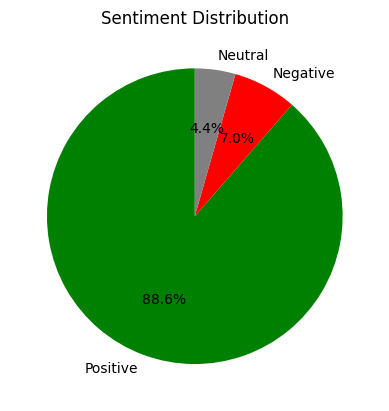

In [13]:
import matplotlib.pyplot as plt

# count the number of reviews with each sentiment
sentiment_counts = music_reviews['sentiment'].value_counts()

# create a list of colors for the pie chart
colors = ['green', 'red', 'gray']

# create the pie chart with the sentiment counts
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# add a title to the pie chart
plt.title('Sentiment Distribution')

# display the pie chart
plt.show()


# Create a function to classify the sentiment of the reviews using a sentiment analysis library like TextBlob.

In [14]:
# define a function to classify the sentiment of a rating
def classify_rating(rating):
    # classify the rating as Positive if it is greater than 3
    if rating > 3:
        return 'Positive'
    # classify the rating as Negative if it is less than 3
    elif rating < 3:
        return 'Negative'
    # classify the rating as Neutral if it is exactly 3
    else:
        return 'Neutral'

# apply the classify_rating function to the 'overall' column of the 'music_reviews' DataFrame
music_reviews['rating_sentiment'] = music_reviews['overall'].apply(classify_rating)


In [15]:
music_reviews.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,clean_text,sentiment,rating_sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014","much write here, exact suppos to. filter pop s...",Positive,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",product exact quit affordable.i realiz doubl s...,Positive,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",primari job devic block breath would otherwis ...,Positive,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",nice windscreen protect mxl mic prevent pops. ...,Positive,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",pop filter great. look perform like studio fil...,Positive,Positive


# Evaluate the performance of the model using metrics like accuracy, precision, recall, and F1-score

In [16]:
# import the necessary evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate the accuracy of the sentiment classification using the 'accuracy_score' function
accuracy = accuracy_score(music_reviews['rating_sentiment'], music_reviews['sentiment'])

# calculate the precision of the sentiment classification using the 'precision_score' function
precision = precision_score(music_reviews['rating_sentiment'], music_reviews['sentiment'], average='weighted')

# calculate the recall of the sentiment classification using the 'recall_score' function
recall = recall_score(music_reviews['rating_sentiment'], music_reviews['sentiment'], average='weighted')

# calculate the F1 score of the sentiment classification using the 'f1_score' function
f1 = f1_score(music_reviews['rating_sentiment'], music_reviews['sentiment'], average='weighted')

# print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


Accuracy: 0.8024559009843095
Precision: 0.7952926439158464
Recall: 0.8024559009843095
F1-score: 0.7982699700347559


# Visualize the results using Matplotlib.

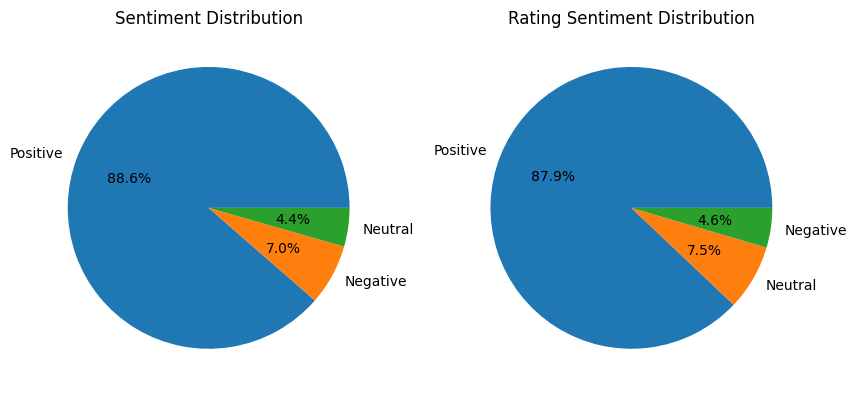

In [17]:
# import the matplotlib library to create visualizations
import matplotlib.pyplot as plt

# count the number of occurrences of each sentiment value in the 'sentiment' column and store the results in 'sentiment_counts'
sentiment_counts = music_reviews['sentiment'].value_counts()

# count the number of occurrences of each sentiment value in the 'rating_sentiment' column and store the results in 'rating_sentiment_counts'
rating_sentiment_counts = music_reviews['rating_sentiment'].value_counts()

# create a figure with two subplots using the 'subplots' function, with a size of 10 inches by 5 inches
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# create a pie chart of the 'sentiment_counts' data using the 'pie' function, with labels and percentage values, and add it to the first subplot
axs[0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')

# set the title of the first subplot to 'Sentiment Distribution' using the 'set_title' function
axs[0].set_title('Sentiment Distribution')

# create a pie chart of the 'rating_sentiment_counts' data using the 'pie' function, with labels and percentage values, and add it to the second subplot
axs[1].pie(rating_sentiment_counts, labels=rating_sentiment_counts.index, autopct='%1.1f%%')

# set the title of the second subplot to 'Rating Sentiment Distribution' using the 'set_title' function
axs[1].set_title('Rating Sentiment Distribution')

# display the figure
plt.show()


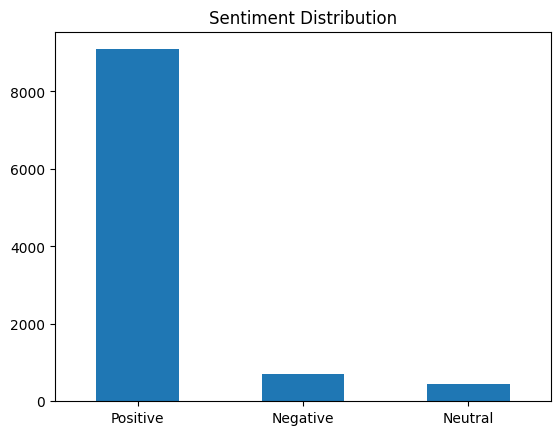

In [18]:
import matplotlib.pyplot as plt

# count the number of occurrences of each sentiment value in the 'sentiment' column and store the results in 'sentiment_counts'
sentiment_counts = music_reviews['sentiment'].value_counts()

# create a bar chart of the 'sentiment_counts' data using the 'bar' function, with labels and add it to the first subplot
ax = sentiment_counts.plot(kind='bar')
ax.set_xticklabels(sentiment_counts.index, rotation=0)

# set the title of the subplot to 'Sentiment Distribution' using the 'set_title' function
ax.set_title('Sentiment Distribution')

# display the figure
plt.show()
